In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import os

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
from matplotlib  import cm

matplotlib.rcParams['figure.figsize'] = (12, 8)

# 1. Importing the Data

In [2]:
f1 = 'dataset/clean/cleaned_data2.csv'

#Take every N-th (in this case 10th) row
n = 10

# Count the lines or use an upper bound
num_lines = sum(1 for l in open(f1))
print 'Number of Rows in CSV: ' + str(num_lines)

# The row indices to skip - make sure 0 is not included to keep the header!
skip_idx = [x for x in range(1, num_lines) if x % n != 0]

df = pd.read_csv(f1, skiprows=skip_idx)
df.info()

Number of Rows in CSV: 95365947
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9536594 entries, 0 to 9536593
Data columns (total 19 columns):
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      int64
trip_distance        float64
fare_amount          float64
trip_time            int64
day_of_week          int64
pickup_hour          int64
month                int64
year                 bool
season               int64
tip_percentage       int64
PRCP                 bool
SNWD                 bool
SNOW                 bool
TMAX                 int64
TMIN                 int64
dtypes: bool(4), float64(6), int64(9)
memory usage: 1.1 GB


In [3]:
def change_tip_grouping(row):
    # 0 is less than 20% and 1 is greater than 20%
    return int(row.tip_percentage >= 4)

df.tip_percentage = df.apply(change_tip_grouping, axis=1)

# 2. Visualizing Some Data

## 2.1 Tips

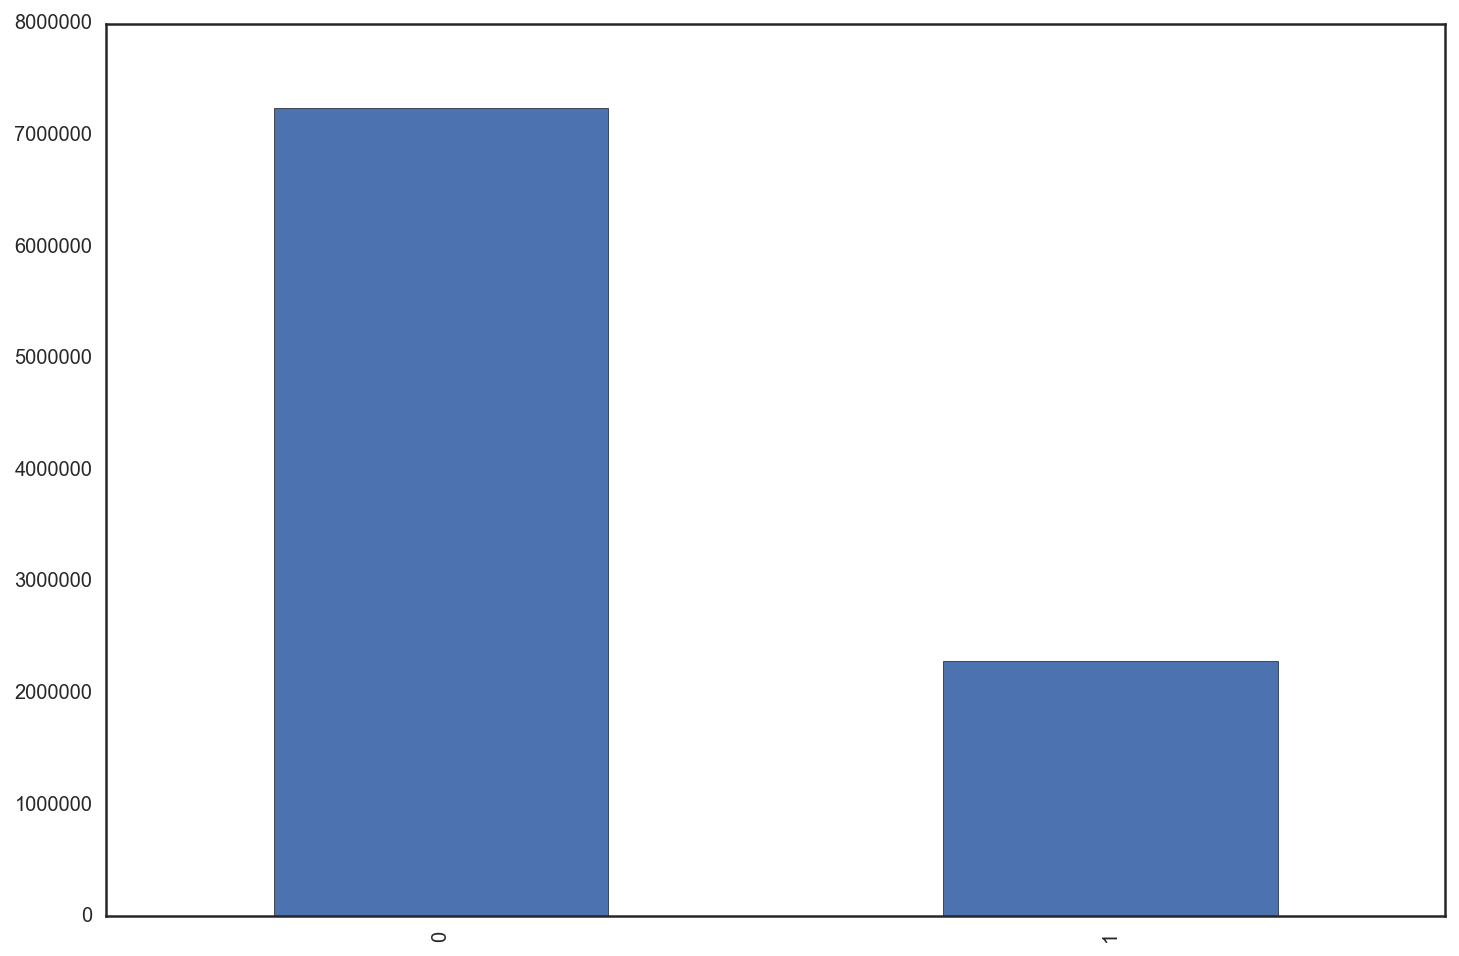

In [80]:
df.tip_percentage.value_counts().plot('bar')

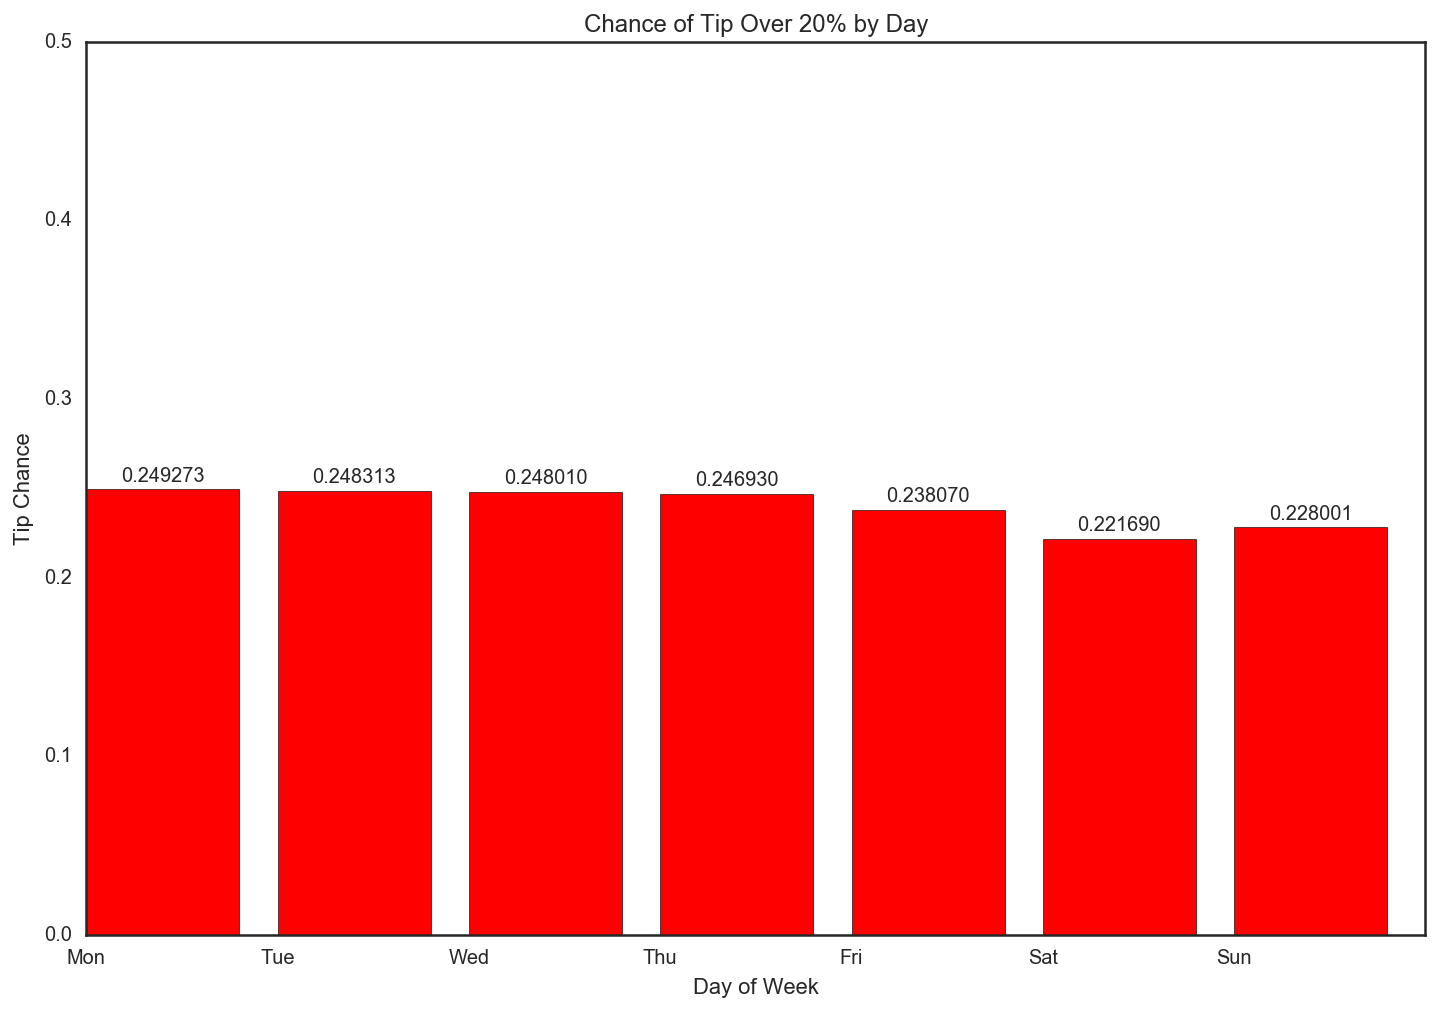

In [101]:
avg_tips = df.groupby(['day_of_week'])['tip_percentage'].mean().reset_index(name='mean')

fig, ax = plt.subplots()
rects = ax.bar(avg_tips.iloc[:,0].values, avg_tips.iloc[:,1].values, color='r')

# add some text for labels, title and axes ticks
ax.set_ylabel('Tip Chance')
ax.set_xlabel('Day of Week')
ax.set_title('Chance of Tip Over 20% by Day')
ax.set_ybound(upper=.5)
ax.set_xticklabels(('Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'))

# method from http://matplotlib.org/examples/api/barchart_demo.html
def autolabel(rects): 
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
                '%f' % height,
                ha='center', va='bottom')

autolabel(rects)

plt.show()

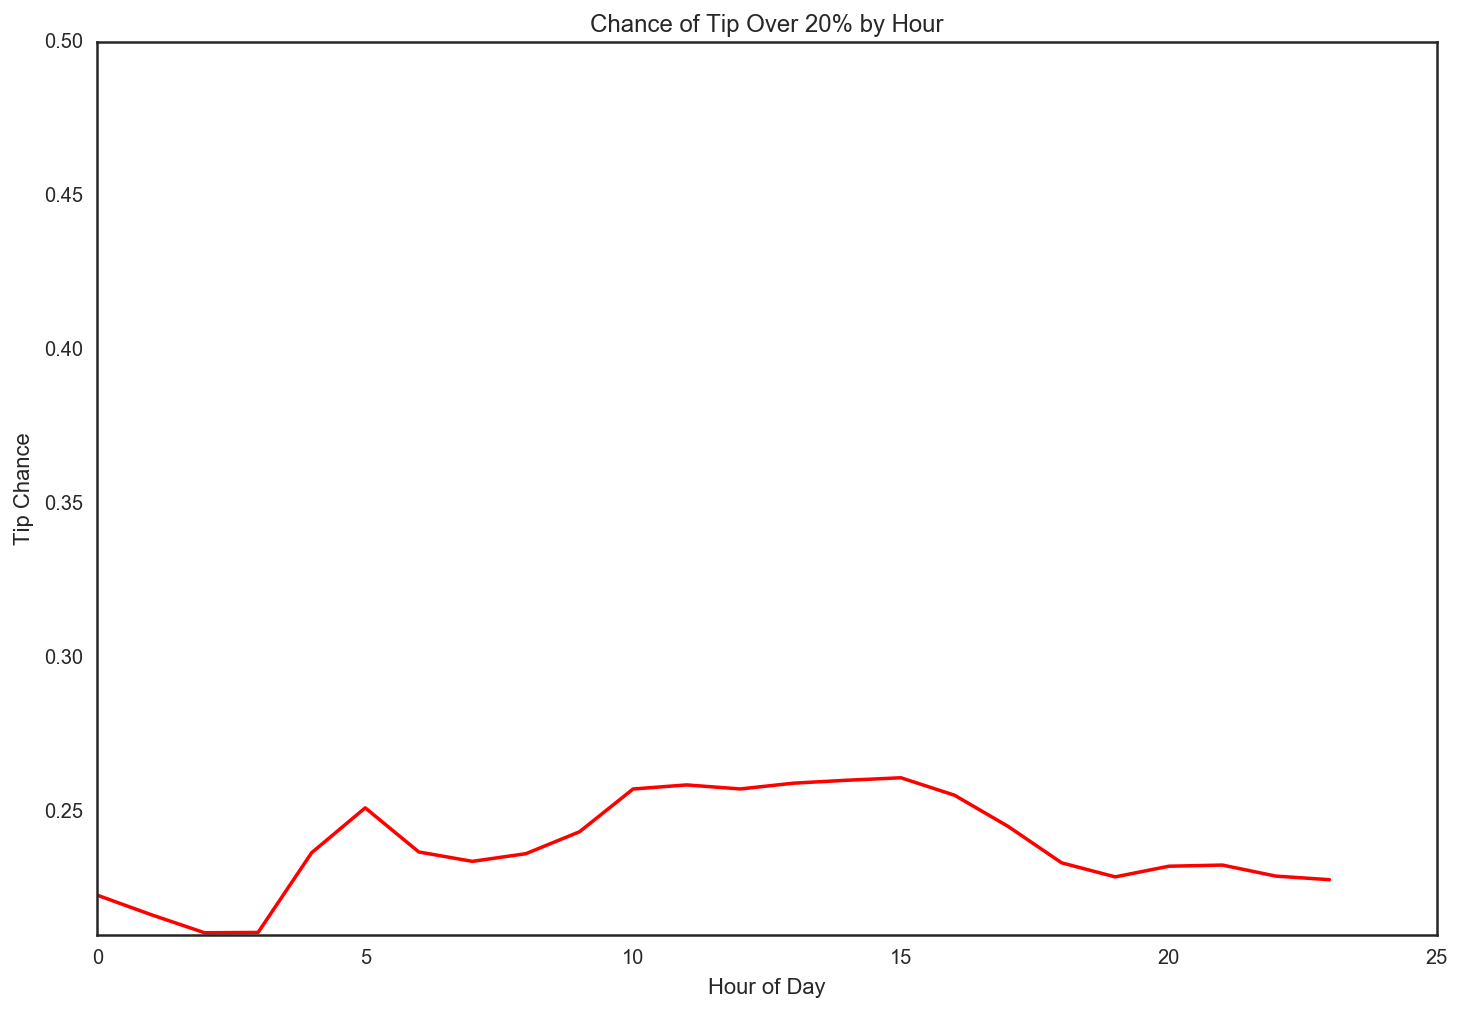

In [108]:
avg_tips = df.groupby(['pickup_hour'])['tip_percentage'].mean().reset_index(name='mean')

fig, ax = plt.subplots()
rects = ax.plot(avg_tips.iloc[:,0].values, avg_tips.iloc[:,1].values, color='r')

# add some text for labels, title and axes ticks
ax.set_ylabel('Tip Chance')
ax.set_xlabel('Hour of Day')
ax.set_ybound(upper=.5)
ax.set_title('Chance of Tip Over 20% by Hour')

plt.show()

## 2.2 Pickups vs Dropoffs

In [83]:
cols = ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'tip_percentage']

# Need to use the second dataset where actual lat/long is still available
f2 = 'dataset/clean/cleaned_data2.csv'

n = 10
num_lines = sum(1 for l in open(f2))
print 'Number of Rows in CSV: ' + str(num_lines)

# The row indices to skip - make sure 0 is not included to keep the header!
skip_idx = [x for x in range(1, num_lines) if x % n != 0]

# Read the data
df2 = pd.read_csv(f2, skiprows=skip_idx, usecols=cols)
df2.info()

Number of Rows in CSV: 95365947
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9536594 entries, 0 to 9536593
Data columns (total 5 columns):
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
tip_percentage       int64
dtypes: float64(4), int64(1)
memory usage: 363.8 MB


In [85]:
df2.tip_percentage = df2.apply(change_tip_grouping, axis=1)

### Pickup Heatmap

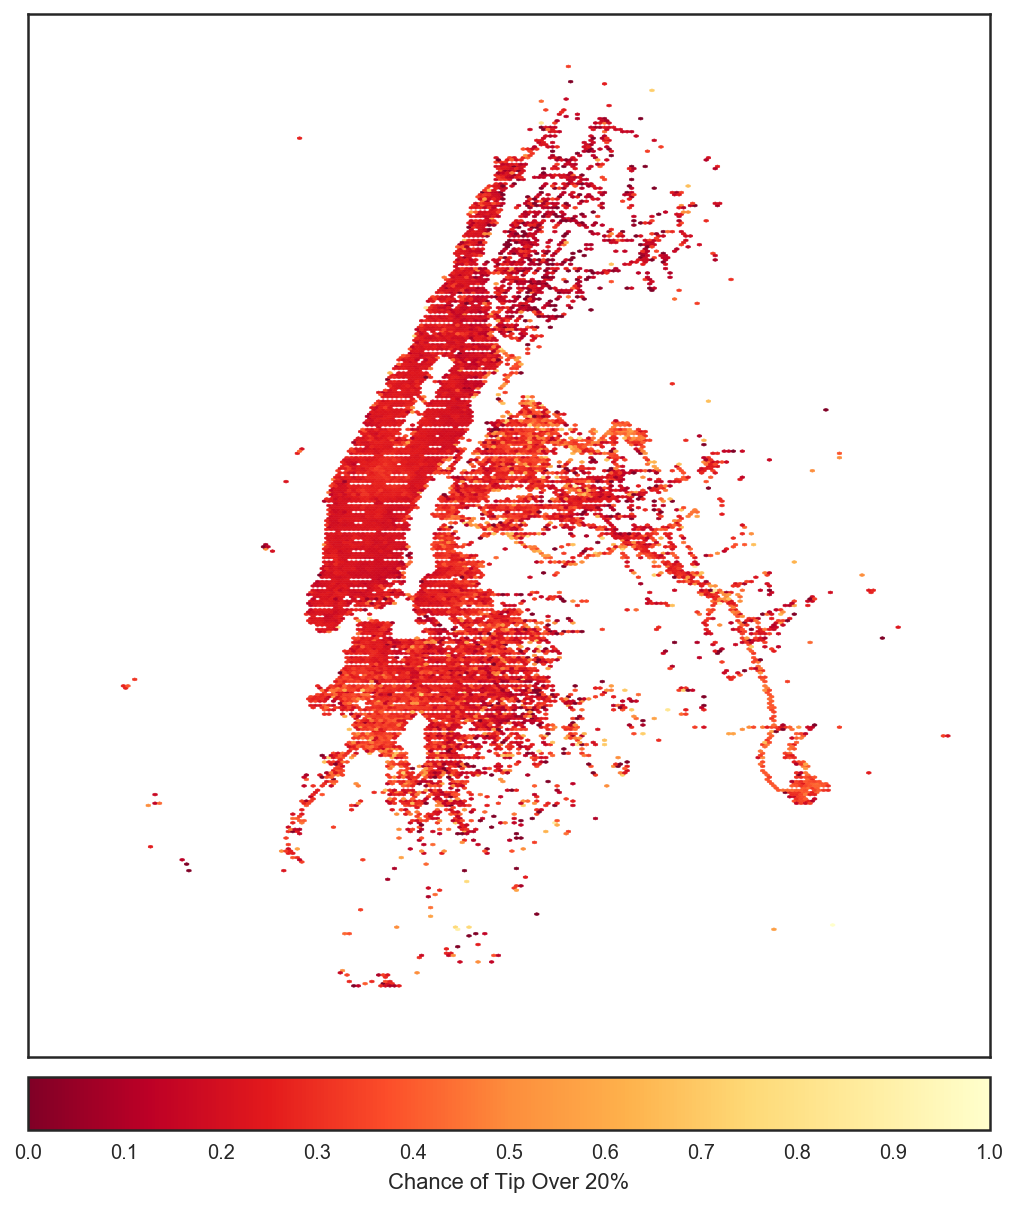

In [106]:
# Code reference for heatmap from http://blog.kaggle.com/2016/11/30/seventeen-ways-to-map-data-in-kaggle-kernels/
from mpl_toolkits.basemap import Basemap
from matplotlib import cm

west, south, east, north = -74.15, 40.55, -73.70, 40.92
 
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111)
 
m = Basemap(projection='merc', llcrnrlat=south, urcrnrlat=north, llcrnrlon=west, urcrnrlon=east, lat_ts=south, resolution='i')
x, y = m(df2['pickup_longitude'].values, df2['pickup_latitude'].values)
z = df2['tip_percentage'].values
m.hexbin(x, y, C=z, gridsize=800, reduce_C_function=np.mean, mincnt=5, cmap=cm.YlOrRd_r)
m.colorbar(location='bottom', label='Chance of Tip Over 20%')

### Dropoff Heatmap

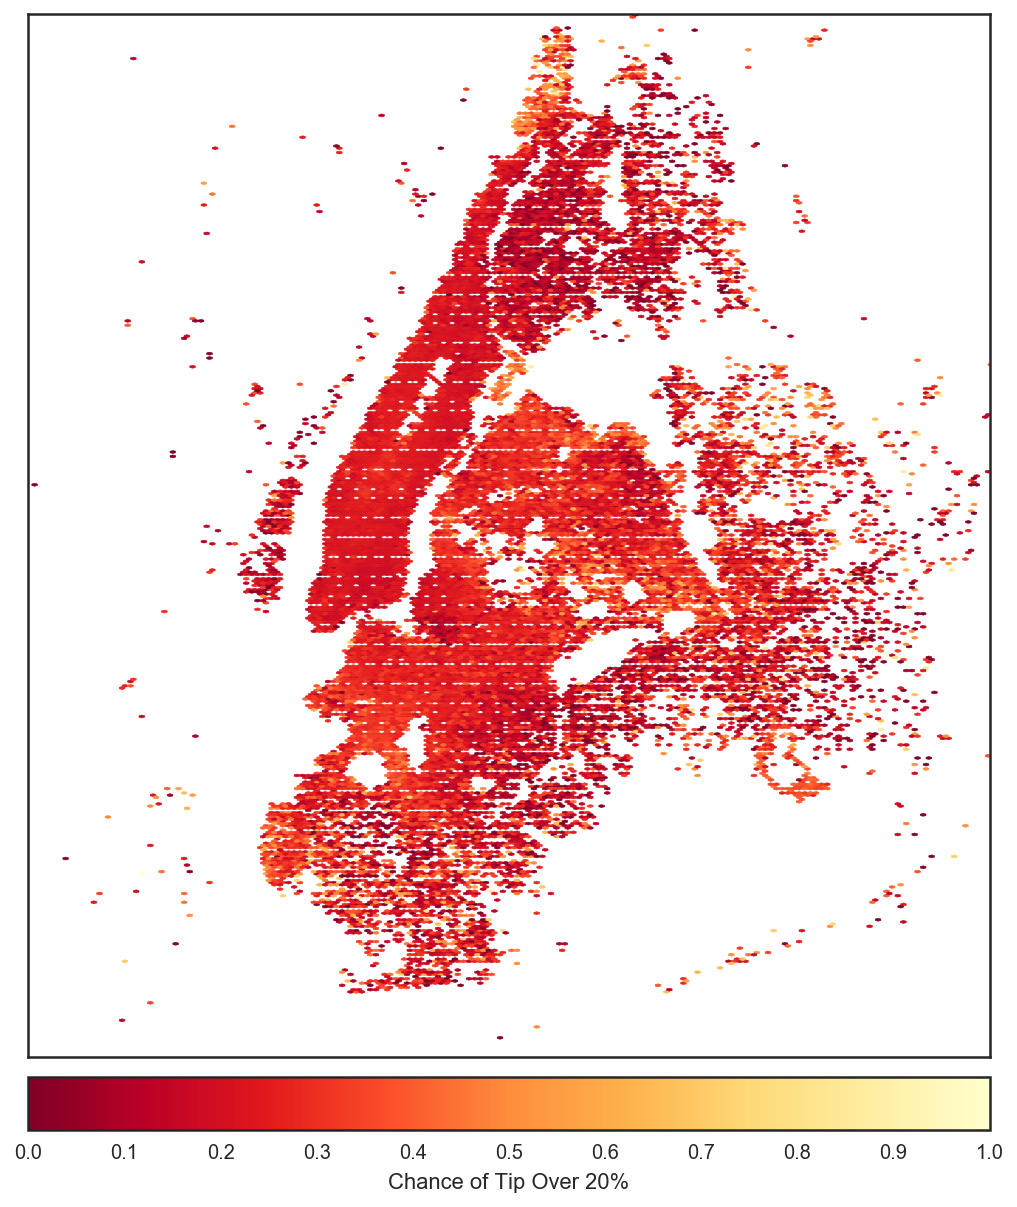

In [107]:
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111)
 
m = Basemap(projection='merc', llcrnrlat=south, urcrnrlat=north, llcrnrlon=west, urcrnrlon=east, lat_ts=south, resolution='i')
x, y = m(df2['dropoff_longitude'].values, df2['dropoff_latitude'].values)
z = df2['tip_percentage'].values
m.hexbin(x, y, C=z, gridsize=800, reduce_C_function=np.mean, mincnt=5, cmap=cm.YlOrRd_r)
m.colorbar(location='bottom', label='Chance of Tip Over 20%')

## 2.3 Passengers

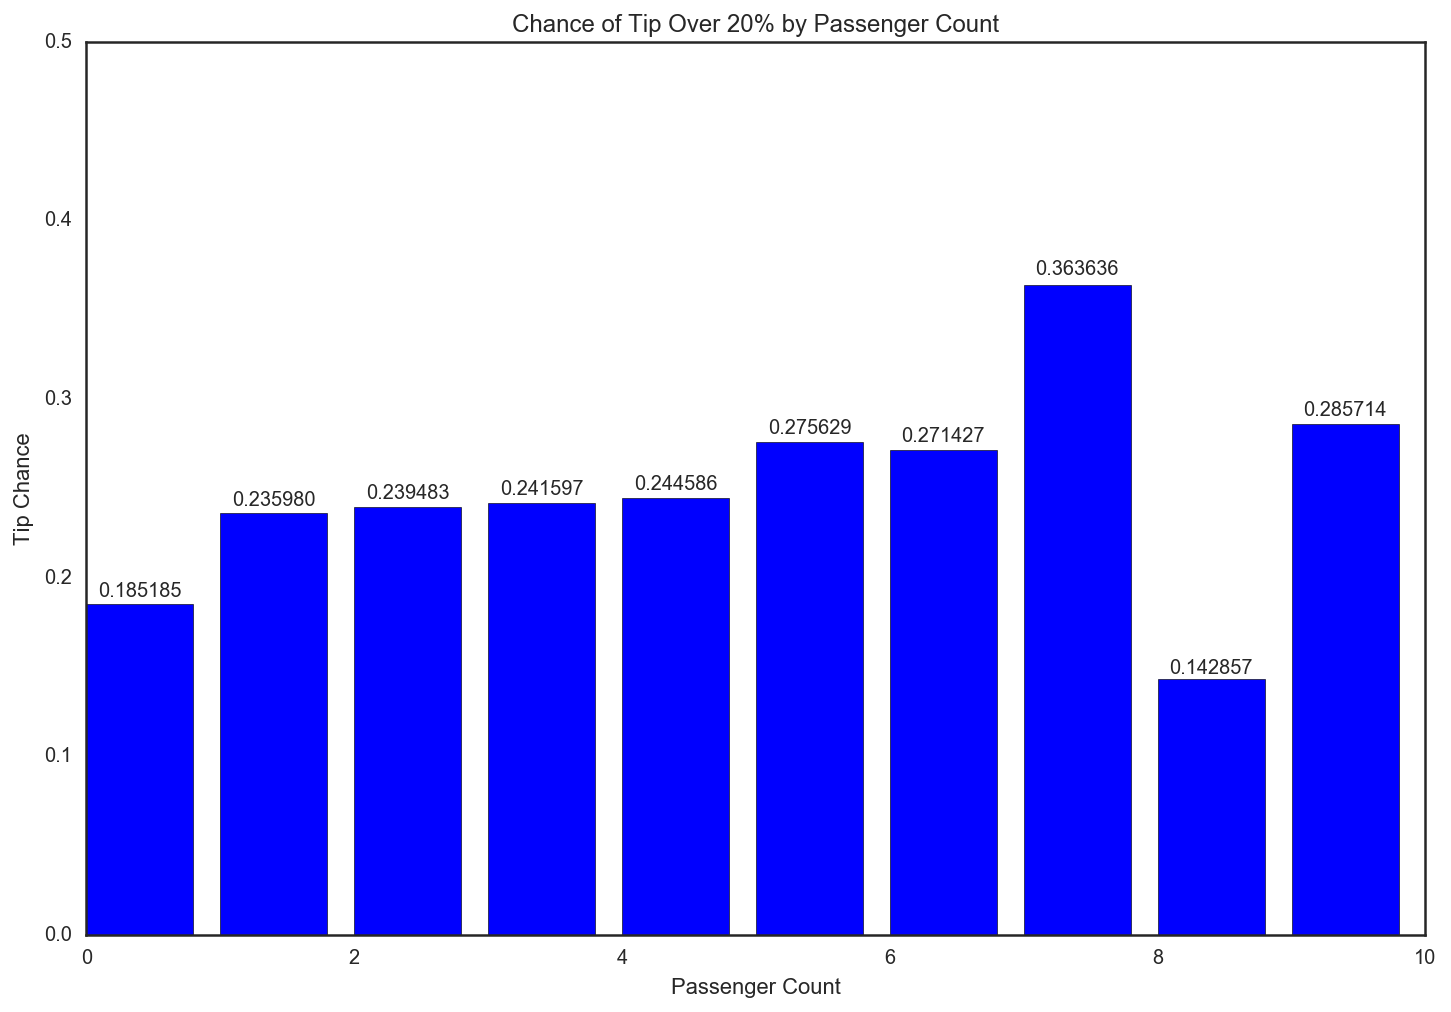

In [114]:
avg_tips = df.groupby(['passenger_count'])['tip_percentage'].mean().reset_index(name='mean')

fig, ax = plt.subplots()
rects = ax.bar(avg_tips.iloc[:,0].values, avg_tips.iloc[:,1].values, color='b')

# add some text for labels, title and axes ticks
ax.set_ylabel('Tip Chance')
ax.set_xlabel('Passenger Count')
ax.set_title('Chance of Tip Over 20% by Passenger Count')
ax.set_ybound(upper=.5)

# method from http://matplotlib.org/examples/api/barchart_demo.html
def autolabel(rects): 
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
                '%f' % height,
                ha='center', va='bottom')

autolabel(rects)

plt.show()

In [4]:
avg_tips_prcp = df.groupby(['PRCP'])['tip_percentage'].mean().reset_index(name='mean')
avg_tips_snow = df.groupby(['SNOW'])['tip_percentage'].mean().reset_index(name='mean')
avg_tips_tmax = df.groupby(['TMAX'])['tip_percentage'].mean().reset_index(name='mean')
avg_tips_tmin = df.groupby(['TMIN'])['tip_percentage'].mean().reset_index(name='mean')

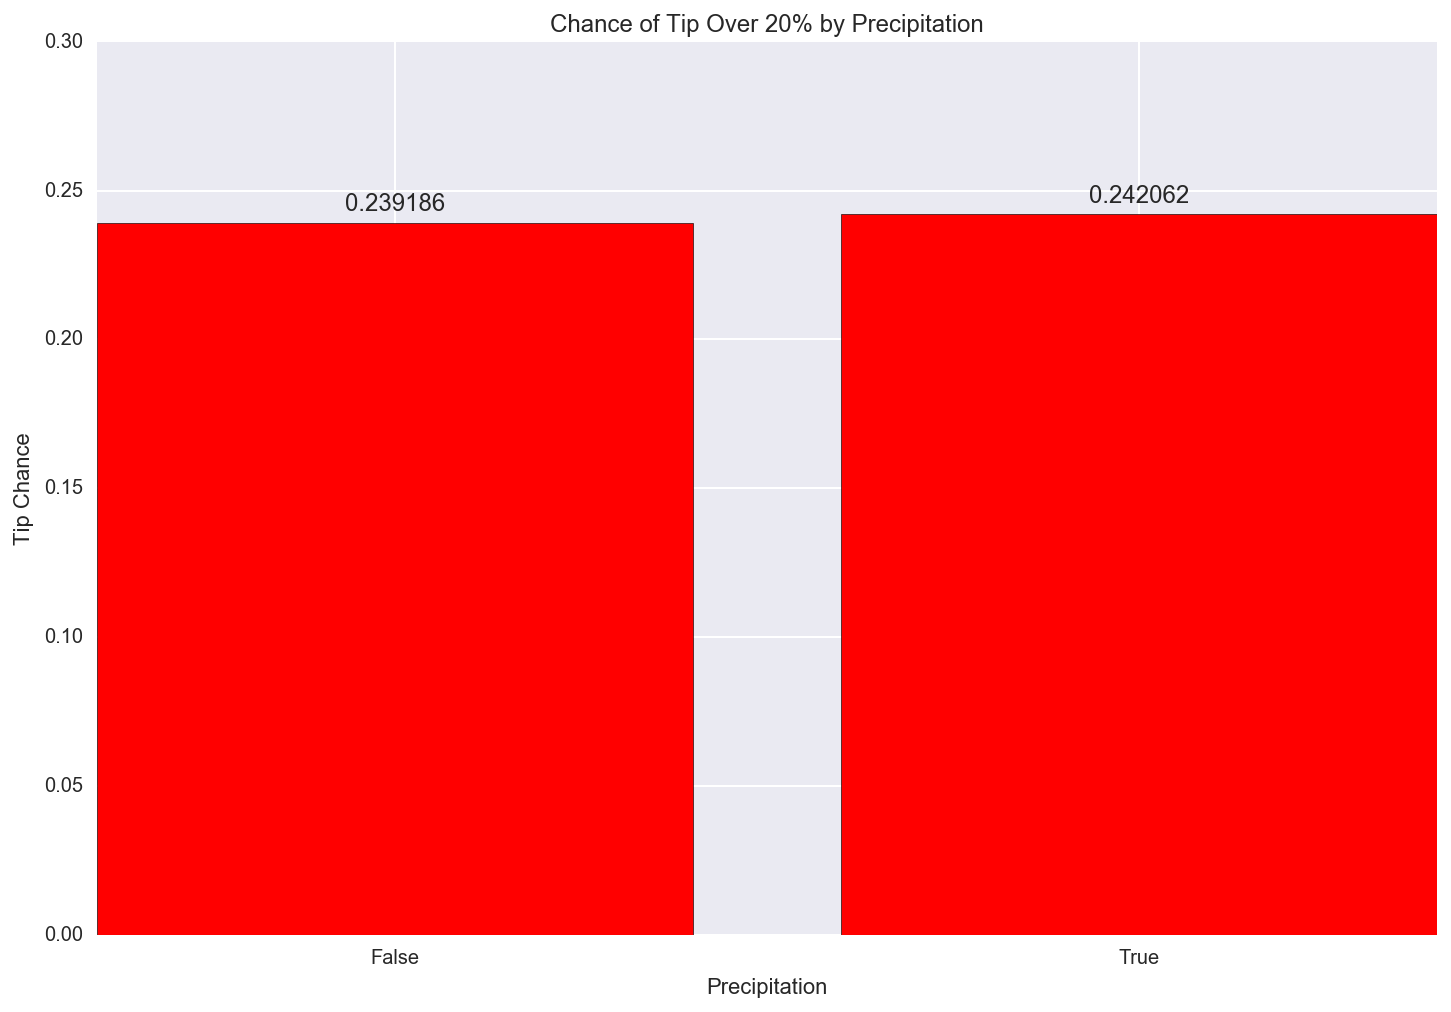

In [13]:
# Rain
fig, ax = plt.subplots()
bar1 = ax.bar(avg_tips_prcp.iloc[:,0].values, avg_tips_prcp.iloc[:,1].values, color='r', align="center")

# add some text for labels, title and axes ticks
ax.set_ylabel('Tip Chance')
ax.set_xlabel('Precipitation')
ax.set_ybound(upper=.3)
ax.set_title('Chance of Tip Over 20% by Precipitation')
ind = range(0, 2)   
plt.xticks(ind, avg_tips_prcp.iloc[:,0].values)

def autolabel(rects): 
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
                '%f' % height,
                ha='center', va='bottom')

autolabel(bar1)

plt.show()

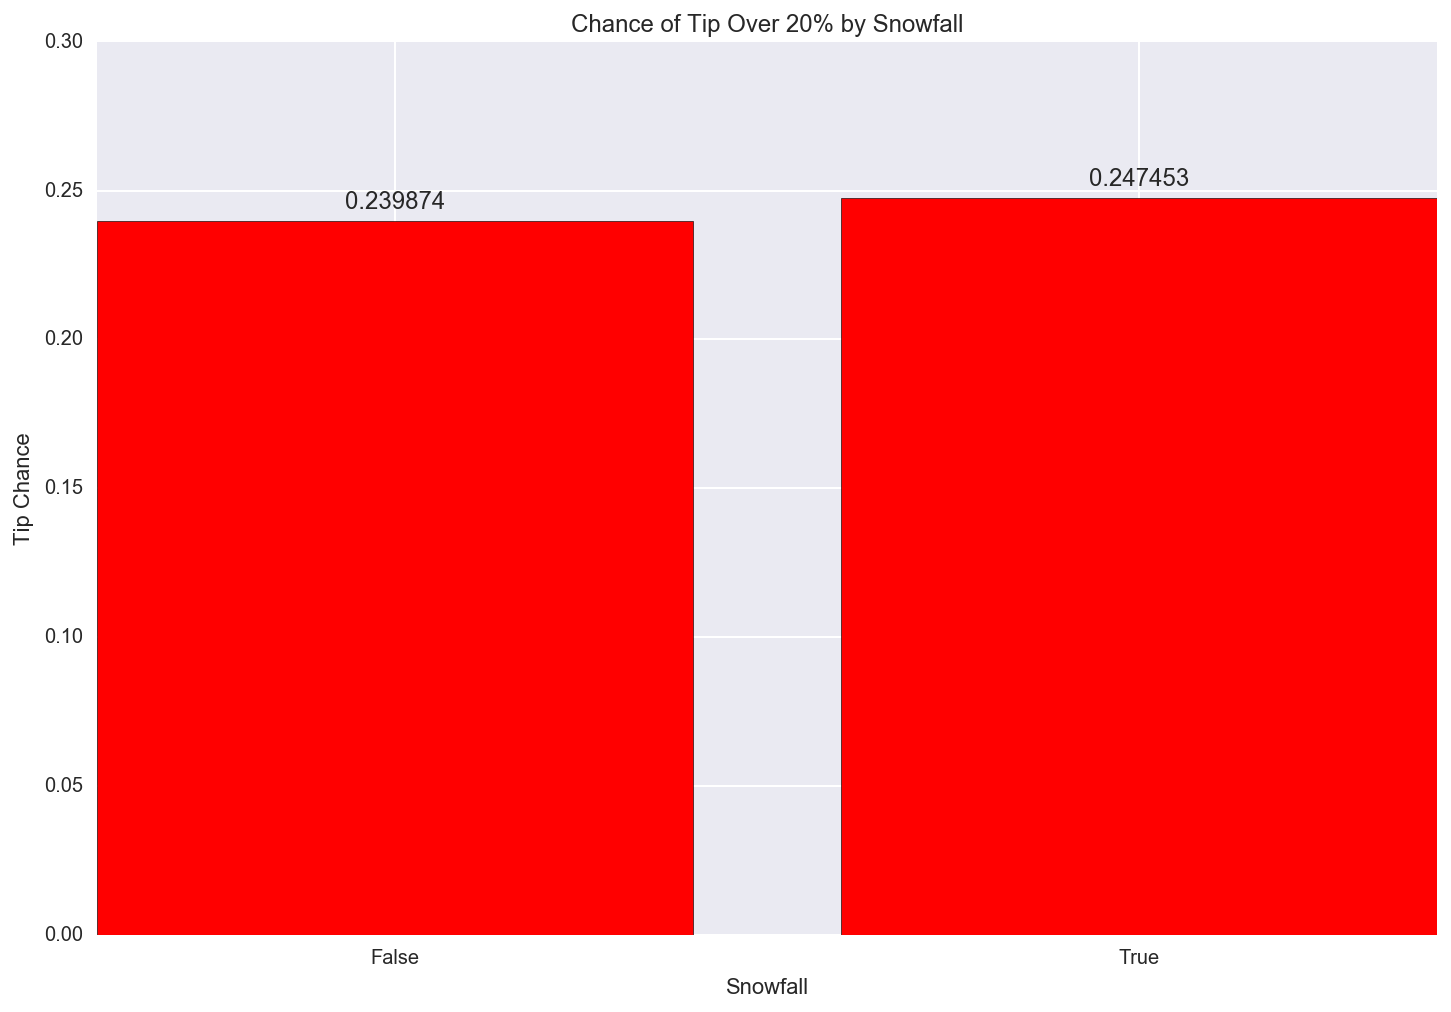

In [15]:
# Snow
fig, ax = plt.subplots()
bar2 = ax.bar(avg_tips_snow.iloc[:,0].values, avg_tips_snow.iloc[:,1].values, color='r', align="center")

# add some text for labels, title and axes ticks
ax.set_ylabel('Tip Chance')
ax.set_xlabel('Snowfall')
ax.set_ybound(upper=.3)
ax.set_title('Chance of Tip Over 20% by Snowfall')
ind = range(0, 2)   
plt.xticks(ind, avg_tips_snow.iloc[:,0].values)

def autolabel(rects): 
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
                '%f' % height,
                ha='center', va='bottom')

autolabel(bar2)

plt.show()

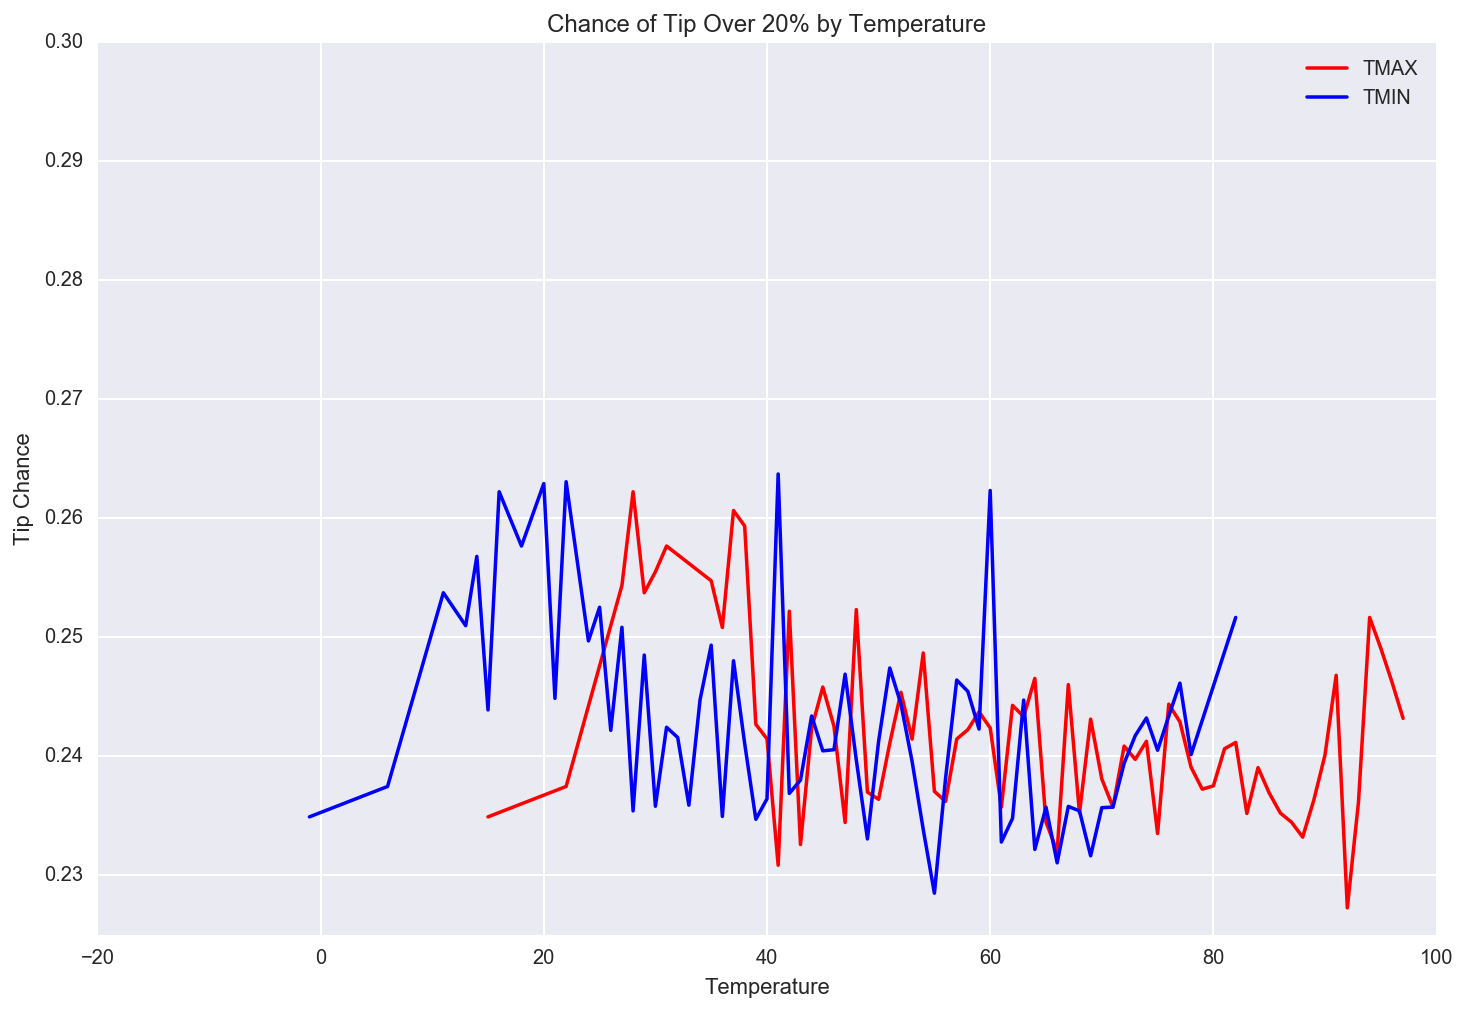

In [22]:
# TMAX TMIN
fig, ax = plt.subplots()
line1 = ax.plot(avg_tips_tmax.iloc[:,0].values, avg_tips_tmax.iloc[:,1].values, color='r', label='TMAX')
line2 = ax.plot(avg_tips_tmin.iloc[:,0].values, avg_tips_tmin.iloc[:,1].values, color='b', label='TMIN')

# add some text for labels, title and axes ticks
ax.set_ylabel('Tip Chance')
ax.set_xlabel('Temperature')
ax.set_ybound(upper=.3)
ax.set_title('Chance of Tip Over 20% by Temperature')
legend = ax.legend(loc='upper right', shadow=True)

plt.show()